In [ ]:
!pip install fastai --upgrade
!pip install torch --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir dataset

In [ ]:
!sudo apt-get install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-25ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
!cp  /content/drive/MyDrive/ChestXRay.zip /content/dataset/

In [ ]:
!unzip /content/dataset/ChestXRay.zip -d /content/dataset/

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/train/NORMAL/NORMAL2-IM-0843-0001.jpeg  
  inflating: /content/dataset/train/NORMAL/NORMAL2-IM-0845-0001.jpeg  
  inflating: /content/dataset/train/NORMAL/NORMAL2-IM-0846-0001.jpeg  
  inflating: /content/dataset/train/NORMAL/NORMAL2-IM-0847-0001.jpeg  
  inflating: /content/dataset/train/NORMAL/NORMAL2-IM-0848-0001.jpeg  
  inflating: /content/dataset/train/NORMAL/NORMAL2-IM-0849-0001.jpeg  
  inflating: /content/dataset/train/NORMAL/NORMAL2-IM-0851-0001-0001.jpeg  
  inflating: /content/dataset/train/NORMAL/NORMAL2-IM-0851-0001-0002.jpeg  
  inflating: /content/dataset/train/NORMAL/NORMAL2-IM-0851-0001.jpeg  
  inflating: /content/dataset/train/NORMAL/NORMAL2-IM-0852-0001.jpeg  
  inflating: /content/dataset/train/NORMAL/NORMAL2-IM-0853-0001.jpeg  
  inflating: /content/dataset/train/NORMAL/NORMAL2-IM-0854-0001.jpeg  
  inflating: /content/dataset/train/NORMAL/NORMAL2-IM-0855-0001.jpeg  
  inflating: /co

In [ ]:
path = Path('/content/dataset/train')

In [ ]:
data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)]
)

In [ ]:
dls = data_block.dataloaders(path, bs=64)

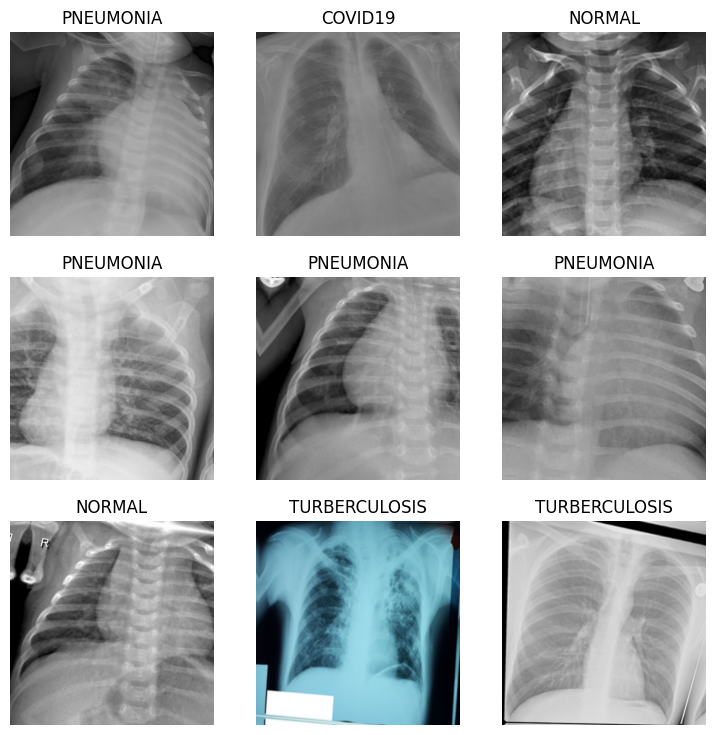

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy)


SuggestedLRs(valley=0.0012022644514217973)

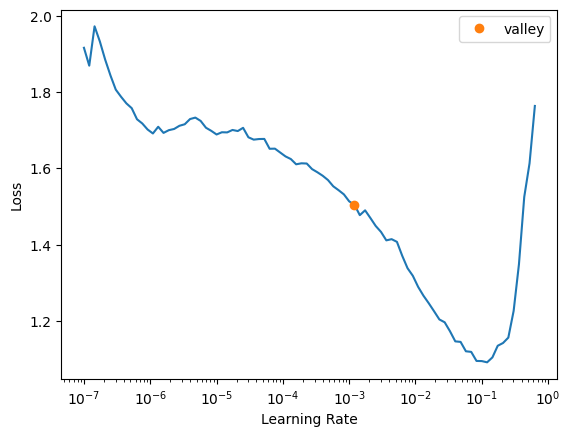

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.586249,0.140141,0.953360,03:04
1,0.286096,0.091164,0.964427,03:05
2,0.152515,0.069158,0.977866,03:05
3,0.113295,0.054882,0.981028,03:04
4,0.097302,0.052852,0.984980,03:09


In [ ]:
learn.export('ChestXRay.pkl')


In [ ]:
learn1 = vision_learner(dls, resnet34, metrics=accuracy)
learn1.fit_one_cycle(10, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.852867,0.194051,0.939921,03:14
1,0.348969,0.109095,0.954150,03:07
2,0.213745,0.065482,0.973123,03:08
3,0.138881,0.115213,0.956522,03:04
4,0.119191,0.060677,0.977866,03:06
5,0.099737,0.050383,0.981028,03:05
6,0.087826,0.032403,0.986561,03:03
7,0.069282,0.031905,0.988142,03:06
8,0.056917,0.025655,0.990514,03:02
9,0.049906,0.028216,0.991304,03:03


In [ ]:
learn1.export('ChestXRay10Epoch.pkl')

In [ ]:
learn2 = vision_learner(dls, resnet34, metrics=accuracy)
learn2.fine_tune(6)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 83.0MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.793400,0.159935,0.947036,03:26


epoch,train_loss,valid_loss,accuracy,time
0,0.230562,0.072405,0.972332,03:17
1,0.178764,0.154043,0.955731,03:17
2,0.144656,0.045144,0.984980,03:17
3,0.076944,0.047103,0.985771,03:16
4,0.063025,0.030759,0.986561,03:16
5,0.049015,0.024123,0.990514,03:18


In [ ]:
learn2.export('ChestXRayfine.pkl')

In [ ]:
import torch
torch.cuda.empty_cache()
import gc
del learn2
gc.collect()
torch.cuda.memory_summary(device=None, abbreviated=False)


'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 2            |        cudaMalloc retries: 3         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      | 452110 KiB |  13793 MiB |  21144 MiB |  20702 MiB |\n|       from large pool | 446019 KiB |  13769 MiB |  21117 MiB |  20682 MiB |\n|       from small pool |   6091 KiB |     23 MiB |     26 MiB |     20 MiB |\n|---------------------------------------------------------------------------|\n| Active memory         | 452110 KiB |  13793 MiB |  21144 MiB |  20702 MiB |\n|       from large pool | 446019 KiB |  13769 MiB |